## Dataset Location : 'c:\\Users\\new\\OneDrive\\Desktop\\Zomato project\\Notebooks\\Data'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('c:\\Users\\new\\OneDrive\\Desktop\\Zomato project\\Notebooks\\Data\\Semi_Cleaned_data.csv')

,Unnamed: 0,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,...,City,Time_taken (min),Distance in kms,Order_Day,Order_month,Order_year,Time_Orderd_Hour,Time_Orderd_mins,Time_Order_picked_Hour,Time_Order_picked_mins
0,0,DEHRES17DEL01,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,...,Metropolitian,46,10.3,12,2,2022,21.0,55.0,22.0,10.0
1,1,KOCRES16DEL01,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,...,Metropolitian,23,6.2,13,2,2022,14.0,55.0,15.0,5.0
2,2,PUNERES13DEL03,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,...,Metropolitian,21,13.8,4,3,2022,17.0,30.0,17.0,40.0
3,3,LUDHRES15DEL02,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,...,Metropolitian,20,2.9,13,2,2022,9.0,20.0,9.0,30.0
4,4,KNPRES14DEL02,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,...,Metropolitian,41,19.4,14,2,2022,19.0,50.0,20.0,5.0


In [11]:
df.drop(df.columns[0],axis=1,inplace=True)

In [12]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance in kms,Order_Day,Order_month,Order_year,Time_Orderd_Hour,Time_Orderd_mins,Time_Order_picked_Hour,Time_Order_picked_mins
0,DEHRES17DEL01,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.3,12,2,2022,21.0,55.0,22.0,10.0
1,KOCRES16DEL01,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.2,13,2,2022,14.0,55.0,15.0,5.0
2,PUNERES13DEL03,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.8,4,3,2022,17.0,30.0,17.0,40.0
3,LUDHRES15DEL02,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.9,13,2,2022,9.0,20.0,9.0,30.0
4,KNPRES14DEL02,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.4,14,2,2022,19.0,50.0,20.0,5.0


In [14]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'Distance in kms', 'Order_Day',
       'Order_month', 'Order_year', 'Time_Orderd_Hour', 'Time_Orderd_mins',
       'Time_Order_picked_Hour', 'Time_Order_picked_mins'],
      dtype='object')

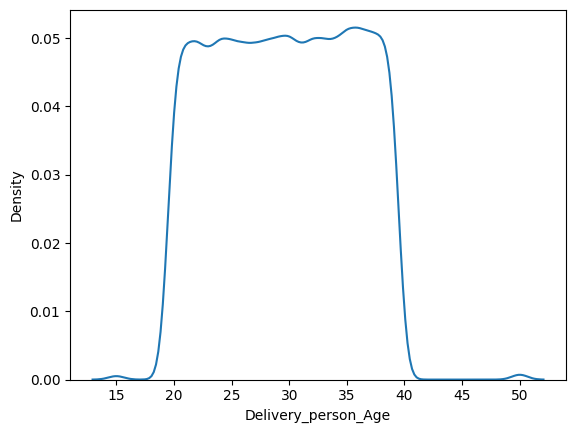

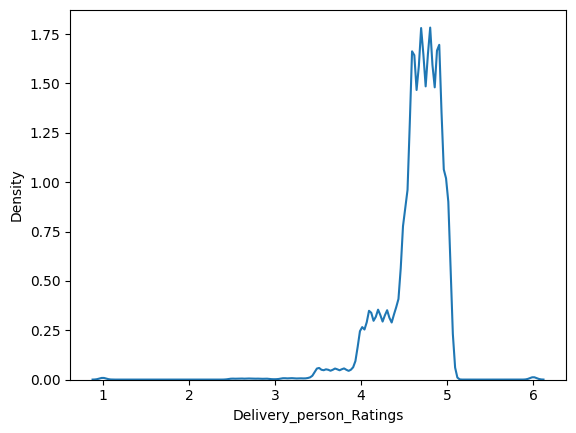

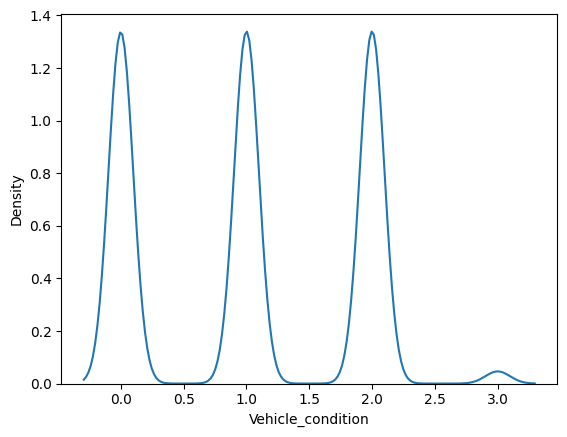

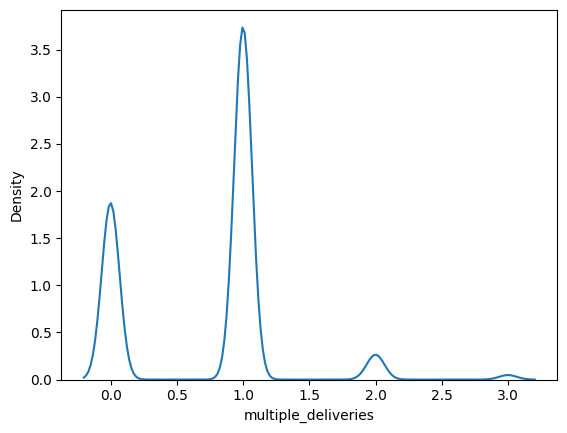

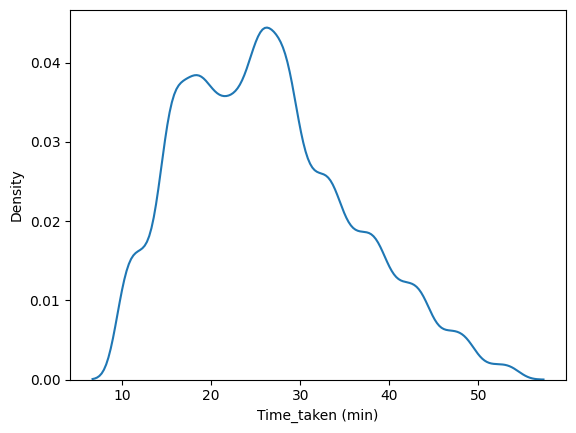

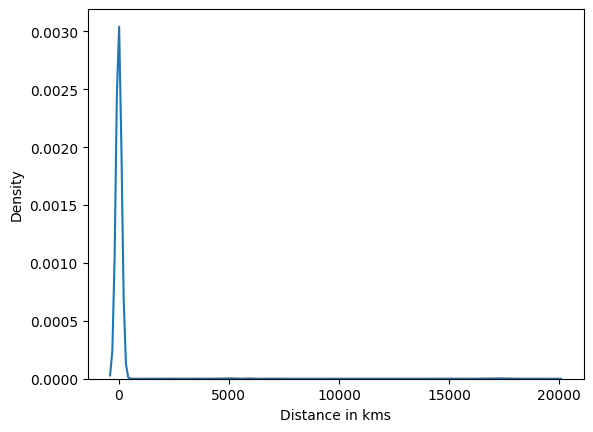

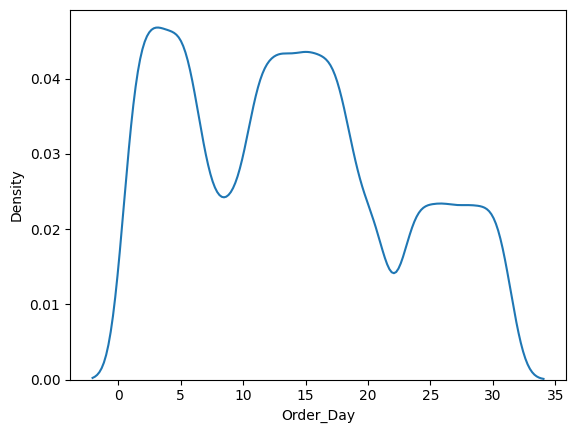

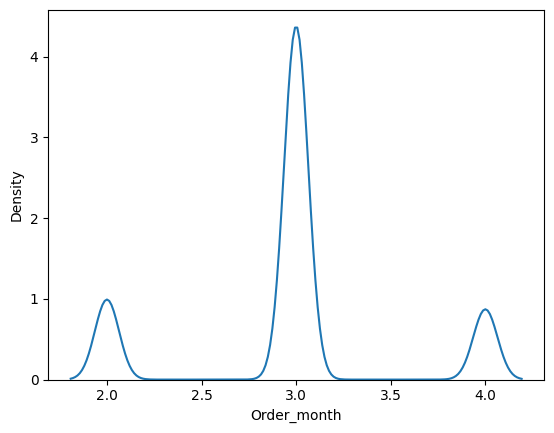

C:\Users\new\AppData\Local\Temp\ipykernel_25348\1762782184.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[i])


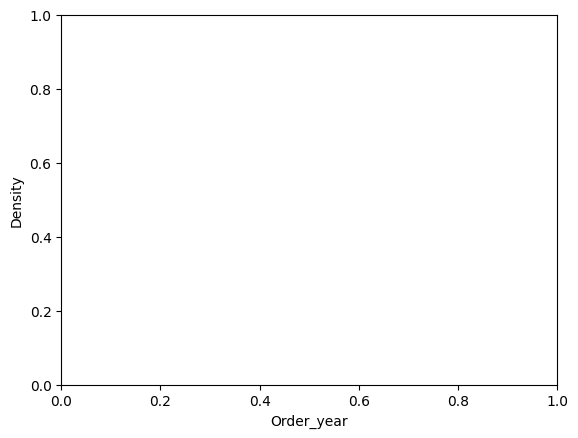

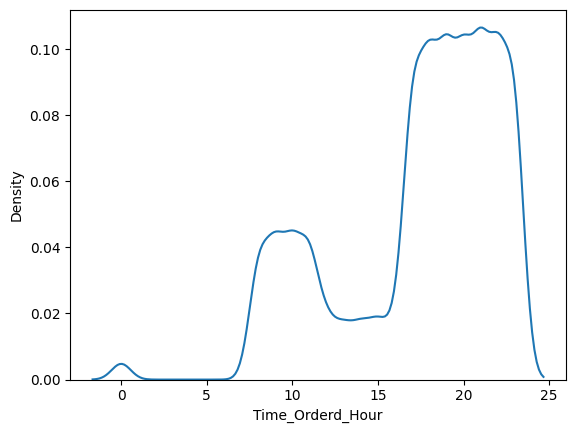

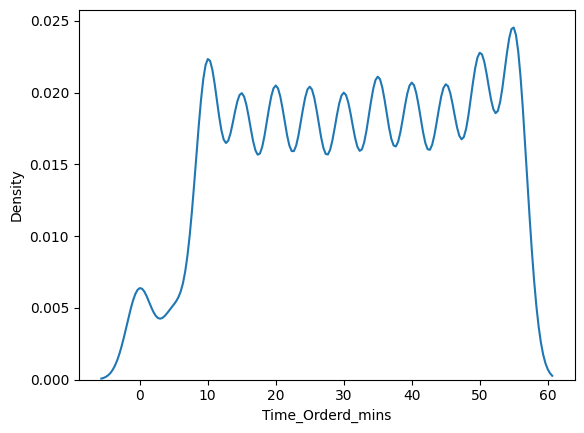

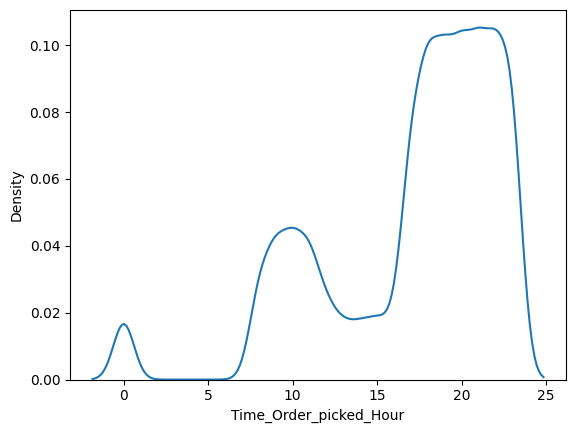

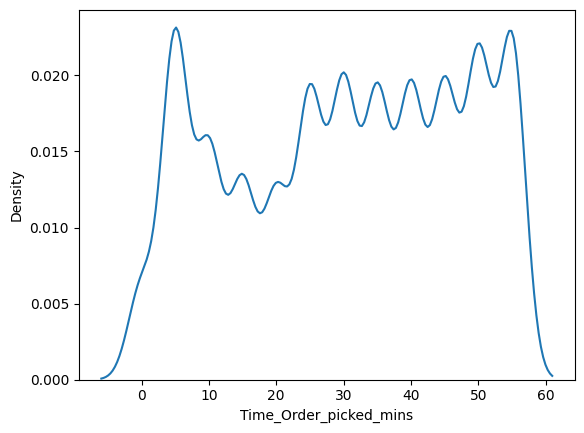

In [13]:
for i in df.select_dtypes(exclude='object').columns:
    sns.kdeplot(df[i])
    plt.show()

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.func(X)
    
class CustomTransformer2(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.func(X)

class CustomTransformer3(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.func(X)




def frequency_encoding(X):
    temp=X['Delivery_person_ID'].value_counts().reset_index()
    h={}
    h=dict(h)
    for i in range(len(temp['Delivery_person_ID'])):
        h[str(temp['Delivery_person_ID'][i])]=temp['count'][i]
    X['Delivery_person_ID']=X['Delivery_person_ID'].replace(h)
    return X


def road_traffic_density(X):
    X = X.copy()
    
    # Define the mapping for road_traffic_density
    density_mapping = {
        'Low': 0,
        'Medium': 1,
        'High': 2,
        'Jam': 3
    }
    
    # Apply the mapping
    X['Road_traffic_density'] = X['Road_traffic_density'].map(density_mapping).astype(float)
    return X


def Type_of_vehicle(X):
    X = X.copy()
    
    # Define the mapping for road_traffic_density
    density_mapping = {
       'bicycle':0,
       'scooter':1,
       'motorcycle':2,
       'electric_scooter':3
    }
    
    # Apply the mapping
    X['Type_of_vehicle'] = X['Type_of_vehicle'].map(density_mapping).astype(float)
    return X


Encoding_tnf=ColumnTransformer(transformers=[
    ("tnf2",OneHotEncoder(drop='first',sparse_output=False),['Weather_conditions','Type_of_order','Festival','City'])
    ],remainder="passthrough")


scaling_tnf=ColumnTransformer(transformers=[
    ("tnf",StandardScaler(),slice(0,18))
],remainder="passthrough")



from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('custom', CustomTransformer(frequency_encoding)),
    ('custom2', CustomTransformer2(road_traffic_density)),
    ('custom3', CustomTransformer3(Type_of_vehicle)),
    ('Encoding_tnf',Encoding_tnf),
    ('scaling_tnf',scaling_tnf),

    
])

In [28]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Time_taken (min)'],axis=1),df[['Time_taken (min)']],test_size=0.3,random_state=45)

In [29]:
X_train=pipeline.fit_transform(X_train)
X_test=pipeline.transform(X_test)

In [37]:
df.columns[19]

'Time_Order_picked_mins'

c:\Users\new\anaconda3\envs\EDA_practice\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 31908, number of used features: 28
[LightGBM] [Info] Start training from score 26.277924


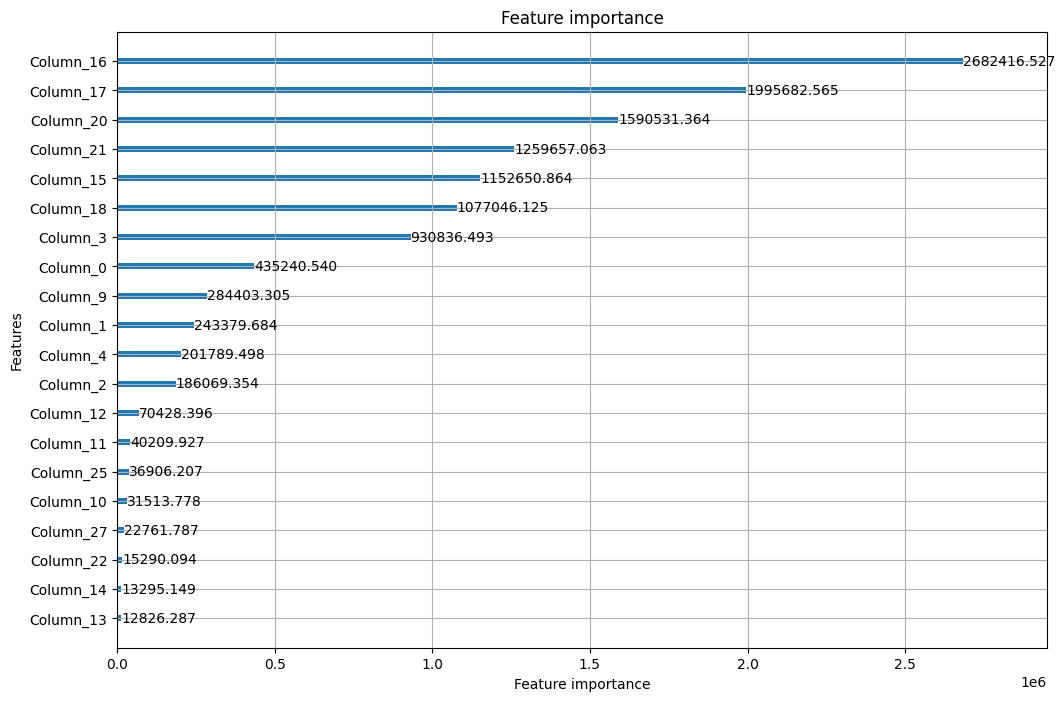

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [33]:
import lightgbm as lgb

# Train LightGBM model
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)

# Plot feature importance
lgb.plot_importance(lgbm, max_num_features=20, importance_type='gain', figsize=(12, 8))
plt.show()

# Select important features
important_features = X_train.columns[lgbm.feature_importances_ > np.mean(lgbm.feature_importances_)]
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

